# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

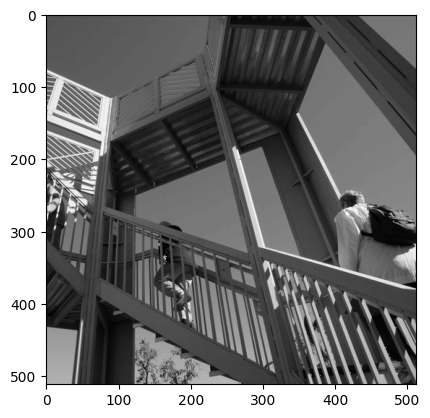

In [14]:
import scipy

X = scipy.datasets.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

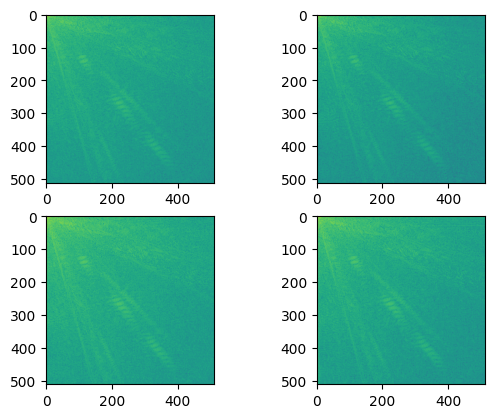

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

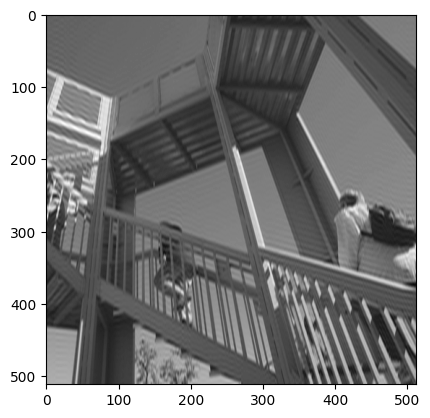

In [5]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

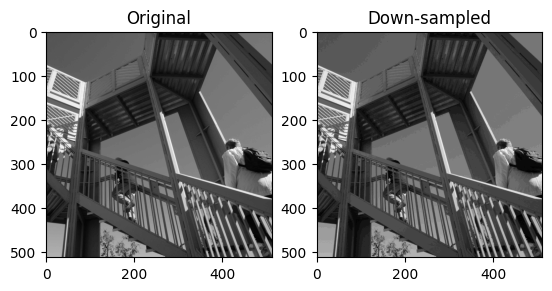

In [6]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

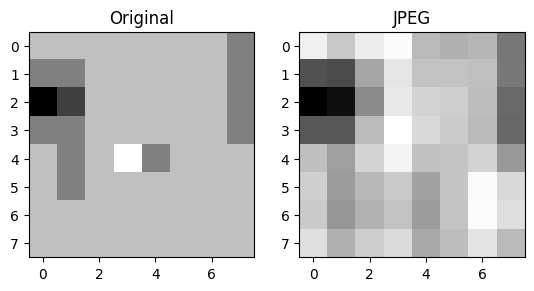

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [7]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

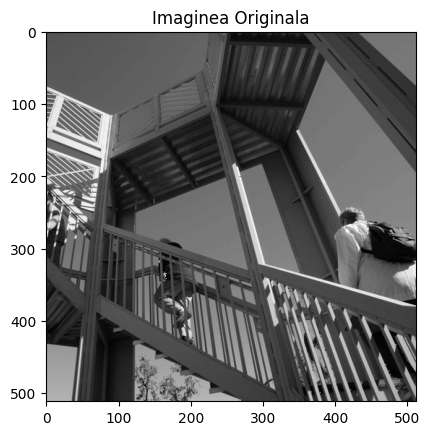

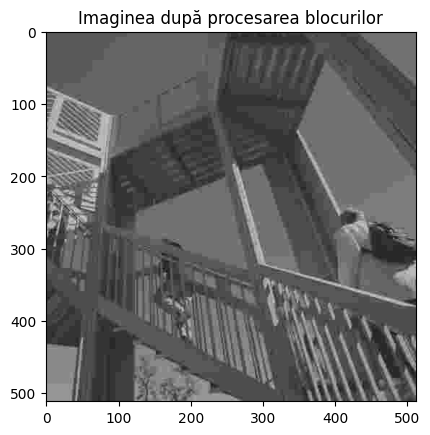

In [33]:
#ex 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn
import scipy

# Încărcăm o imagine de exemplu, în acest caz, folosim imaginea 'ascent' din Scipy
X = scipy.datasets.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.title("Imaginea Originala")
plt.show()

# Funcția care procesează blocurile
def process_blocks(X, Q):
    h, w = X.shape
    x_processed = np.zeros_like(X, dtype=float)
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            # Asigurăm că nu depășim dimensiunile imaginii
            if i + 8 <= h and j + 8 <= w:
                # Selectăm blocul curent de 8x8 pixeli
                block = X[i:i + 8, j:j + 8]

                # Aplicăm DCT (Transformata Cosinus Discretă)
                dct_block = dctn(block, type=2, norm='ortho')

                # Cuantizăm coeficienții DCT
                quantized_block = np.round(dct_block / Q) * Q

                # Aplicăm Inversa DCT pentru a obține blocul reconstruit
                idct_block = idctn(quantized_block, type=2, norm='ortho')

                # Salvăm blocul reconstruit în imaginea procesată
                x_processed[i:i + 8, j:j + 8] = idct_block
    return x_processed

# Matricea de cuantizare JPEG (exemplu)
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Aplicăm procesarea pe întreaga imagine
Q_aggressive = Q_jpeg * 10
X_blocks = process_blocks(X, Q_aggressive)


# Afișăm imaginea după prelucrare
plt.imshow(X_blocks, cmap=plt.cm.gray)
plt.title('Imaginea după procesarea blocurilor')
plt.show()

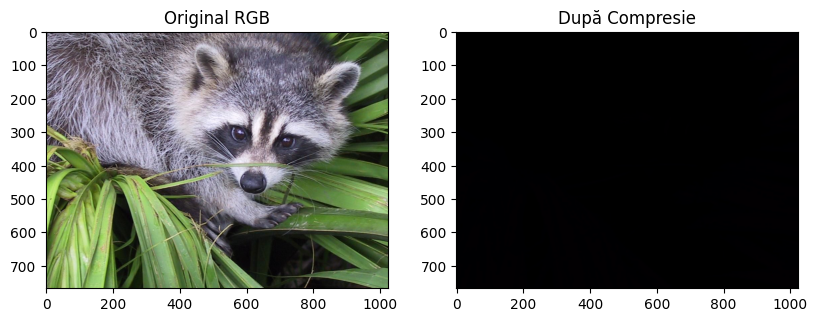

In [8]:
#ex 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn
from skimage import color
import scipy

# Încărcăm o imagine color
X_color = scipy.datasets.face()

# Afișăm imaginea color originală
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.imshow(X_color)
plt.title('Original RGB')

# Transformăm imaginea din RGB în Y'CbCr
X_ycbcr = color.rgb2ycbcr(X_color)

# Funcția care procesează blocurile
def process_blocks(X, Q):
    h, w = X.shape
    x_processed = np.zeros_like(X, dtype=float)
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            if i + 8 <= h and j + 8 <= w:
                block = X[i:i + 8, j:j + 8]
                dct_block = dctn(block, type=2, norm='ortho')
                quantized_block = np.round(dct_block / Q) * Q
                idct_block = idctn(quantized_block, type=2, norm='ortho')
                x_processed[i:i + 8, j:j + 8] = idct_block
    return x_processed

# Matricea de cuantizare JPEG originală
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Aplicăm procesarea pe fiecare canal Y, Cb și Cr
X_ycbcr_compressed = np.zeros_like(X_ycbcr, dtype=float)
for i in range(3):
    X_ycbcr_compressed[:, :, i] = process_blocks(X_ycbcr[:, :, i], Q_jpeg)

# Scalăm valorile Y'CbCr comprimate înapoi în intervalul 0-255 și le convertim la uint8
X_ycbcr_compressed = X_ycbcr_compressed - X_ycbcr_compressed.min()
X_ycbcr_compressed = 255 * (X_ycbcr_compressed / X_ycbcr_compressed.max())
X_ycbcr_compressed = X_ycbcr_compressed.astype('uint8')

# Transformăm înapoi imaginea din Y'CbCr în RGB
X_rgb_compressed = color.ycbcr2rgb(X_ycbcr_compressed)

# Ne asigurăm că valorile sunt în intervalul 0-255 și sunt de tip uint8
X_rgb_compressed = np.clip(X_rgb_compressed * 255, 0, 255).astype('uint8')

# Afișăm imaginea comprimată
plt.subplot(1, 3, 2)
plt.imshow(X_rgb_compressed)
plt.title('După Compresie')
plt.show()

##mentionez ca la mine pe local in pycharm, imaginea dupa compresie arata ca in PNG-ul compresie. Nu stiu de ce apare cu negru total in git.

Iteration 1, MSE curent: 12.369241636956467, Factor cuantizare: 1
Iteration 2, MSE curent: 13.256537694851735, Factor cuantizare: 1.1
Iteration 3, MSE curent: 14.610278247844697, Factor cuantizare: 1.2000000000000002
Iteration 4, MSE curent: 16.148189789338755, Factor cuantizare: 1.3000000000000003
Iteration 5, MSE curent: 17.88911318636477, Factor cuantizare: 1.4000000000000004
Iteration 6, MSE curent: 19.350565289450007, Factor cuantizare: 1.5000000000000004
Iteration 7, MSE curent: 20.662658200533105, Factor cuantizare: 1.6000000000000005
Iteration 8, MSE curent: 22.537986812713456, Factor cuantizare: 1.7000000000000006
Iteration 9, MSE curent: 24.50338922613118, Factor cuantizare: 1.8000000000000007
Iteration 10, MSE curent: 26.85714765419353, Factor cuantizare: 1.9000000000000008
Iteration 11, MSE curent: 28.979427110693575, Factor cuantizare: 2.000000000000001
Iteration 12, MSE curent: 31.295681917787192, Factor cuantizare: 2.100000000000001
Iteration 13, MSE curent: 32.995901221

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 235, MSE curent: 1019.3395868479826, Factor cuantizare: 24.40000000000008


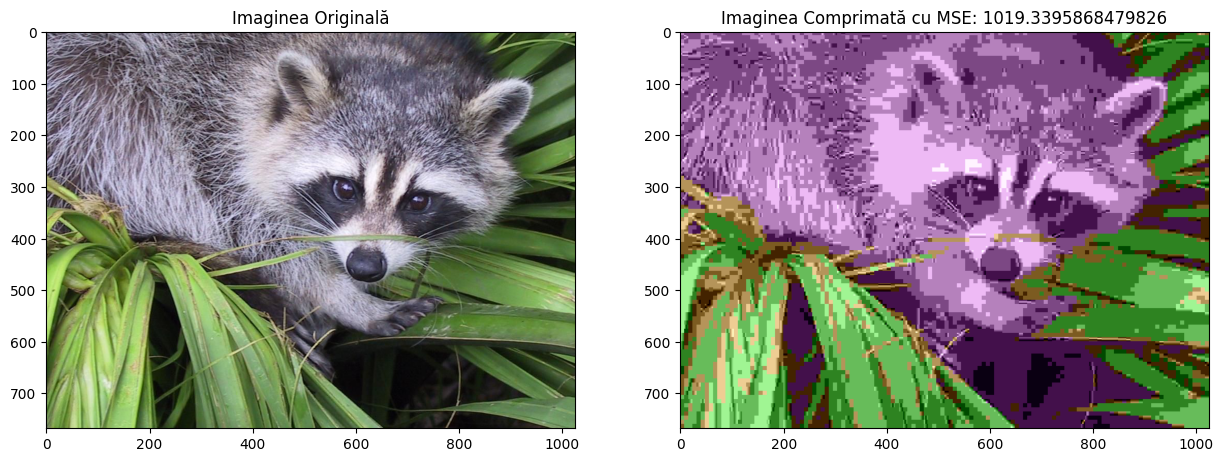

In [5]:
#ex 3

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dctn, idctn
from skimage import color
import scipy

# Încărcăm o imagine color
X_color = scipy.datasets.face()

# Transformăm imaginea din RGB în Y'CbCr
X_ycbcr = color.rgb2ycbcr(X_color)

# Inițializează X_ycbcr_compressed cu același shape ca X_ycbcr
X_ycbcr_compressed = np.zeros_like(X_ycbcr)

# Funcția care procesează blocurile
def process_blocks(X, Q):
    h, w = X.shape
    x_processed = np.zeros_like(X, dtype=float)
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            if i + 8 <= h and j + 8 <= w:
                block = X[i:i + 8, j:j + 8]
                dct_block = dctn(block, type=2, norm='ortho')
                quantized_block = np.round(dct_block / Q) * Q
                idct_block = idctn(quantized_block, type=2, norm='ortho')
                x_processed[i:i + 8, j:j + 8] = idct_block
    return x_processed

# Funcția pentru calculul MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Matricea de cuantizare JPEG originală
Q_jpeg = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                   [12, 12, 14, 19, 26, 28, 60, 55],
                   [14, 13, 16, 24, 40, 57, 69, 56],
                   [14, 17, 22, 29, 51, 87, 80, 62],
                   [18, 22, 37, 56, 68, 109, 103, 77],
                   [24, 35, 55, 64, 81, 104, 113, 92],
                   [49, 64, 78, 87, 103, 121, 120, 101],
                   [72, 92, 95, 98, 112, 100, 103, 99]])

# Pragul MSE impus de utilizator
target_mse = 1000  # Acesta este un exemplu, setează-l conform necesităților tale

# Factor de ajustare pentru matricea de cuantizare
Q_factor = 1

# Inițializează o variabilă pentru a ține evidența iterațiilor
iteration = 0

# Bucla de compresie până când MSE-ul dorit este atins
while True:

    iteration += 1  # Incrementăm numărul iterației
    Q_adjusted = Q_jpeg * Q_factor
    for i in range(3):
        X_ycbcr_compressed[:, :, i] = process_blocks(X_ycbcr[:, :, i], Q_adjusted)

    current_mse = mse(X_ycbcr, X_ycbcr_compressed)
    print(f"Iteration {iteration}, MSE curent: {current_mse}, Factor cuantizare: {Q_factor}")

    if current_mse >= target_mse:
        break
    Q_factor += 0.1  # Ajustează acest pas pentru control mai fin

    # Asigură-te că nu intri într-o buclă infinită
    if iteration >= 1000:
        print("Număr maxim de iterații atins.")
        break

X_rgb_compressed = color.ycbcr2rgb(X_ycbcr_compressed)  # Convertim înapoi la RGB

# Afișăm imaginile originală și comprimată pentru comparație
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(X_color)
plt.title('Imaginea Originală')

plt.subplot(1, 2, 2)
plt.imshow(X_rgb_compressed)
plt.title(f'Imaginea Comprimată cu MSE: {current_mse}')
plt.show()